In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/real-state-dataset/df_main_Real-State.csv')

In [3]:
df.head(10)

,url,price,description,location,type,size,bedrooms,bathrooms,available_from,payment_method,down_payment,category
0,https://www.propertyfinder.eg/en/plp/buy/chale...,"8,000,000",OWN A CHALET IN EL GOUNA WITH A PRIME LOCATION...,"Swan Lake Gouna, Al Gouna, Hurghada, Red Sea",Chalet,732 sqft / 68 sqm,1+ Maid,1,31 Aug 2025,Cash,"1,200,000 EGP",Fully Finished
1,https://www.propertyfinder.eg/en/plp/buy/villa...,"25,000,000","For sale, a villa with immediate delivery in C...","Karmell, New Zayed City, Sheikh Zayed City, Giza",Villa,"2,368 sqft / 220 sqm",4,4,2 Sep 2025,Cash,"2,100,000 EGP",Ready
2,https://www.propertyfinder.eg/en/plp/buy/chale...,"15,135,000","With a down payment of EGP 1,513,000, a fully ...","Azha North, Ras Al Hekma, North Coast",Chalet,"1,270 sqft / 118 sqm",2,2,19 Aug 2025,Cash,"1,513,000 EGP",Fully Finished
3,https://www.propertyfinder.eg/en/plp/buy/apart...,"12,652,000",Own an apartment in New Cairo with a minimal d...,"Taj City, 5th Settlement Compounds, The 5th Se...",Apartment,"1,787 sqft / 166 sqm",3,2,26 Aug 2025,Installments,"1,260,000 EGP",Semi Finished
4,https://www.propertyfinder.eg/en/plp/buy/villa...,"45,250,000",Project: Granville\nLocation: Fifth Settlement...,"Granville, New Capital City, Cairo",Villa,"4,306 sqft / 400 sqm",7,7,2 Sep 2025,Cash,"2,262,500 EGP",Fully Finished
5,https://www.propertyfinder.eg/en/plp/buy/chale...,"19,760,000",Chalet with Marina and Lake View in The Island...,"Marina 5, Marina, Al Alamein, North Coast",Chalet,"1,356 sqft / 126 sqm",3,2,26 Aug 2025,Installments,"988,000 EGP",Fully Finished
6,https://www.propertyfinder.eg/en/plp/buy/penth...,"9,000,000",Penthouse 4BR for sale with Installments over ...,"The Icon Residence, 5th Settlement Compounds, ...",Penthouse,"2,820 sqft / 262 sqm",4,5,3 Jul 2025,Installments,NaN,Not Specified
7,https://www.propertyfinder.eg/en/plp/buy/villa...,"2,770,000","Stand-alone villa in NYOUM Compound, October\n...","Nyoum October, Northern Expansions, 6 October ...",Villa,"3,983 sqft / 370 sqm",5+ Maid,5,26 Aug 2025,Cash,NaN,Not Specified
8,https://www.propertyfinder.eg/en/plp/buy/twin-...,"13,200,000",**La Vista Ras El Hikma seaview twinhouse - Re...,"La vista Ras El Hikma, Ras Al Hekma, North Coast",Twin House,"2,368 sqft / 220 sqm",3,3,25 Aug 2025,Cash,NaN,Ready
9,https://www.propertyfinder.eg/en/plp/buy/duple...,"22,300,000",A 195-square-meter duplex + a 42-square-meter ...,"Azad, 5th Settlement Compounds, The 5th Settle...",Duplex,"2,099 sqft / 195 sqm",3+ Maid,2,7 Aug 2025,Installments,"2,230,000 EGP",Ready


In [4]:
df.drop(['url', 'description'], axis=1, inplace=True) # حزفنا العمده الي ملهاش لازمه ؟ لانها مش مناسبه لسياق المشكه 

In [5]:
df['price'] = df['price'].str.replace(',', '') 
df['down_payment'] = df['down_payment'].str.replace(',','').str.replace('EGP', '') # بدلنا العلامات الي ملهاش لازمه ؟ عشان هتعملي مشاكل بعد كدا في ال data types

In [6]:
pattern = r'^([^,]+),\s*(.*),\s*([^,]+)$'
df[['Project_Name', 'Area_Details', 'Region_Governorate']] = df['location'].str.extract(pattern) # اكتشفت ان عمود العنوان عباره عن اسم المحافظه وبعدين المدينه وبعدين المنطقه و اسم المشروع فا طلعت اول كلمه ك اسم المحافظه واخر كلمه ك اسم المشروع والجزء الي في النص ك تفاصيل المنطقه 

In [7]:
values_area = df['Area_Details'].value_counts()
values_area # هنا بعمل استكشاف للمنطقه بالتفاصيل عشان اشوف هفصلها ازاي 

Area_Details
5th Settlement Compounds, The 5th Settlement, New Cairo City    3670
Ras Al Hekma                                                    1791
Sidi Abdel Rahman                                               1055
6 October Compounds, 6 October City                             1029
Sheikh Zayed Compounds, Sheikh Zayed City                        973
                                                                ... 
Mustafa Kamel, Hay Sharq                                           1
Akher Faisal, Faisal, Hay El Haram                                 1
Garden City                                                        1
6th District, Obour City                                           1
10th District, Sheikh Zayed City                                   1
Name: count, Length: 303, dtype: int64

In [8]:
# df['Area'] = df['Area_Details'].str.rsplit(',', n=1, expand=True)[0].str.strip()
df['Area'] = df['Area_Details'].str.split(',', n=1, expand=True)[0].str.strip()

df['City'] = df['Area_Details'].str.rsplit(',', n=1, expand=True)[1].str.strip()
df['City'] = df['City'].fillna(df['Area'])

print(df[['Area_Details', 'Area', 'City']].head(10))

                                        Area_Details  \
0                                 Al Gouna, Hurghada   
1                  New Zayed City, Sheikh Zayed City   
2                                       Ras Al Hekma   
3  5th Settlement Compounds, The 5th Settlement, ...   
4                                   New Capital City   
5                                 Marina, Al Alamein   
6  5th Settlement Compounds, The 5th Settlement, ...   
7                Northern Expansions, 6 October City   
8                                       Ras Al Hekma   
9  5th Settlement Compounds, The 5th Settlement, ...   

                       Area               City  
0                  Al Gouna           Hurghada  
1            New Zayed City  Sheikh Zayed City  
2              Ras Al Hekma       Ras Al Hekma  
3  5th Settlement Compounds     New Cairo City  
4          New Capital City   New Capital City  
5                    Marina         Al Alamein  
6  5th Settlement Compounds     New Cair

In [9]:
df['Is_Compound'] = df['location'].str.contains('Compounds', case=False, na=False)

In [10]:
v_compund = df['Is_Compound'].value_counts()
v_compund

Is_Compound
False    12598
True      7326
Name: count, dtype: int64

In [11]:
df['location'] = df['location'].str.lower()

In [12]:
keyword_list = ['compound', 'village', 'resort', 'residence', 'compounds']
pattern = '|'.join(keyword_list)
check_location = df['location'].str.contains(pattern, case=False, na=False)
df['is_compound'] = check_location
vl_compund = df['is_compound'].value_counts()
vl_compund

is_compound
False    11459
True      8465
Name: count, dtype: int64

In [13]:
df['Area'] = df['Area'].str.lower()

In [14]:
df['Area'] = df['Area'].str.replace('compounds', '', case=False).str.strip() # بنضف كلمه كمبوند من عمود المنطقه عشان ميظهرش وحنا بنعمل group by حته نضافه 

In [15]:
df['Area']

0                al gouna
1          new zayed city
2            ras al hekma
3          5th settlement
4        new capital city
               ...       
19919    new alamein city
19920      5th settlement
19921     markaz al hamam
19922      mostakbal city
19923      qesm ad dabaah
Name: Area, Length: 19924, dtype: object

In [16]:
df['type'].value_counts() # بشوف لو في اي قيم غريبه او متكرره باسم مختلف

type
Apartment          8355
Chalet             4038
Villa              3570
Townhouse          1335
Twin House          834
Duplex              622
Penthouse           569
iVilla              268
Hotel Apartment     104
Land                 63
Cabin                38
Palace               23
Whole Building       14
Roof                  6
Full Floor            4
Bulk Sale Unit        3
Bungalow              1
Name: count, dtype: int64

In [17]:
df[['size_1', 'size_2']] = df['size'].str.rsplit('/', expand=True)

In [18]:
df['size_2'] = df['size_2'].str.replace('sqm', '')

In [19]:
df.rename(columns={'size_2' : 'size_sqm'}, inplace=True)

In [20]:
df[['bedrooms_new', 'with_maid']] = df['bedrooms'].str.split('+', n=1, expand=True)

In [21]:
df

,price,location,type,size,bedrooms,bathrooms,available_from,payment_method,down_payment,category,...,Area_Details,Region_Governorate,Area,City,Is_Compound,is_compound,size_1,size_sqm,bedrooms_new,with_maid
0,8000000,"swan lake gouna, al gouna, hurghada, red sea",Chalet,732 sqft / 68 sqm,1+ Maid,1,31 Aug 2025,Cash,1200000,Fully Finished,...,"Al Gouna, Hurghada",Red Sea,al gouna,Hurghada,False,False,732 sqft,68,1,Maid
1,25000000,"karmell, new zayed city, sheikh zayed city, giza",Villa,"2,368 sqft / 220 sqm",4,4,2 Sep 2025,Cash,2100000,Ready,...,"New Zayed City, Sheikh Zayed City",Giza,new zayed city,Sheikh Zayed City,False,False,"2,368 sqft",220,4,None
2,15135000,"azha north, ras al hekma, north coast",Chalet,"1,270 sqft / 118 sqm",2,2,19 Aug 2025,Cash,1513000,Fully Finished,...,Ras Al Hekma,North Coast,ras al hekma,Ras Al Hekma,False,False,"1,270 sqft",118,2,None
3,12652000,"taj city, 5th settlement compounds, the 5th se...",Apartment,"1,787 sqft / 166 sqm",3,2,26 Aug 2025,Installments,1260000,Semi Finished,...,"5th Settlement Compounds, The 5th Settlement, ...",Cairo,5th settlement,New Cairo City,True,True,"1,787 sqft",166,3,None
4,45250000,"granville, new capital city, cairo",Villa,"4,306 sqft / 400 sqm",7,7,2 Sep 2025,Cash,2262500,Fully Finished,...,New Capital City,Cairo,new capital city,New Capital City,False,False,"4,306 sqft",400,7,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19919,10500000,"north edge towers, new alamein city, al alamei...",Chalet,"1,259 sqft / 117 sqm",2,2,21 Aug 2025,Cash,NaN,Fully Finished,...,"New Alamein City, Al Alamein",North Coast,new alamein city,Al Alamein,False,False,"1,259 sqft",117,2,None
19920,24000000,"eastown, 5th settlement compounds, the 5th set...",Duplex,"2,756 sqft / 256 sqm",3+ Maid,4,1 Sep 2025,Cash,NaN,Fully Finished,...,"5th Settlement Compounds, The 5th Settlement, ...",Cairo,5th settlement,New Cairo City,True,True,"2,756 sqft",256,3,Maid
19921,3000000,"white sand, markaz al hamam, north coast",Chalet,"1,195 sqft / 111 sqm",2,2,30 Jul 2025,Cash,NaN,Fully Finished,...,Markaz Al Hamam,North Coast,markaz al hamam,Markaz Al Hamam,False,False,"1,195 sqft",111,2,None
19922,9500000,"sarai, mostakbal city compounds, mostakbal cit...",Villa,"2,573 sqft / 239 sqm",5,4,23 Aug 2025,Cash,NaN,Not Specified,...,"Mostakbal City Compounds, Mostakbal City - Fut...",Cairo,mostakbal city,Mostakbal City - Future City,True,True,"2,573 sqft",239,5,None


In [22]:
df['payment_method'] = df['payment_method'].str.strip()
df['down_payment'] = pd.to_numeric(df['down_payment'], errors='coerce')

In [23]:
conditions = [
    (df['down_payment'] > 0),             # 1. لو فيه رقم مقدم (أكبر من صفر)
    (df['down_payment'] == 0),            # 2. لو المقدم = 0
    (df['down_payment'].isnull())       # 3. لو المقدم فاضي (NaN)
]

choices = [
    'Installments',       # 1. يبقى ده "تقسيط" (ده هيصلح الـ 2676 الغلط)
    'Zero Down Payment',  # 2. يبقى ده "بدون مقدم"
    'Cash / Unspecified'  # 3. يبقى ده "كاش أو غير محدد
]

df['payment_method_cleaned'] = np.select(conditions, choices, default='Other')   

In [24]:
df['payment_method_cleaned'].value_counts()

payment_method_cleaned
Cash / Unspecified    14479
Installments           5445
Name: count, dtype: int64

In [25]:
df['down_payment'] = df['down_payment'].fillna(0)

In [26]:
df['with_maid'] = df['with_maid'].fillna('No Maid').str.strip()

In [27]:
df['available_from'] = pd.to_datetime(df['available_from'], errors='coerce')

In [28]:
today = pd.to_datetime('2025-11-1').normalize()

conditions = [
    (df['available_from'].isnull()),
    (df['available_from'] <= today)
]

choices = [
    'unspecified',
    'avialble_now'
]

df['status'] = np.select(conditions, choices, default='future available')

In [29]:
time_diff = df['available_from'] - today
df['Days_to_Availability'] = time_diff.dt.days
def clean_days(x):
    if pd.isnull(x):
        return np.nan  # لو القيمة فاضية، سيبها فاضية زي ما هي
    else:
        return max(x, 0) # لو رقم، هات الأكبر بينه وبين الـ 0 (عشان نشيل السالب)

df['Days_to_Availability'] = df['Days_to_Availability'].apply(clean_days)

In [30]:
df['status'].value_counts()

status
avialble_now        19044
unspecified           663
future available      217
Name: count, dtype: int64

In [31]:
df.columns

Index(['price', 'location', 'type', 'size', 'bedrooms', 'bathrooms',
       'available_from', 'payment_method', 'down_payment', 'category',
       'Project_Name', 'Area_Details', 'Region_Governorate', 'Area', 'City',
       'Is_Compound', 'is_compound', 'size_1', 'size_sqm', 'bedrooms_new',
       'with_maid', 'payment_method_cleaned', 'status',
       'Days_to_Availability'],
      dtype='object')

In [32]:
df.drop(['location', 'size', 'bedrooms', 'Is_Compound', 'size_1', 'payment_method'], axis=1, inplace=True) # ننضف الاعمده 

In [33]:
df

,price,type,bathrooms,available_from,down_payment,category,Project_Name,Area_Details,Region_Governorate,Area,City,is_compound,size_sqm,bedrooms_new,with_maid,payment_method_cleaned,status,Days_to_Availability
0,8000000,Chalet,1,2025-08-31,1200000.0,Fully Finished,Swan Lake Gouna,"Al Gouna, Hurghada",Red Sea,al gouna,Hurghada,False,68,1,Maid,Installments,avialble_now,0.0
1,25000000,Villa,4,2025-09-02,2100000.0,Ready,Karmell,"New Zayed City, Sheikh Zayed City",Giza,new zayed city,Sheikh Zayed City,False,220,4,No Maid,Installments,avialble_now,0.0
2,15135000,Chalet,2,2025-08-19,1513000.0,Fully Finished,Azha North,Ras Al Hekma,North Coast,ras al hekma,Ras Al Hekma,False,118,2,No Maid,Installments,avialble_now,0.0
3,12652000,Apartment,2,2025-08-26,1260000.0,Semi Finished,Taj City,"5th Settlement Compounds, The 5th Settlement, ...",Cairo,5th settlement,New Cairo City,True,166,3,No Maid,Installments,avialble_now,0.0
4,45250000,Villa,7,2025-09-02,2262500.0,Fully Finished,Granville,New Capital City,Cairo,new capital city,New Capital City,False,400,7,No Maid,Installments,avialble_now,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19919,10500000,Chalet,2,2025-08-21,0.0,Fully Finished,North Edge Towers,"New Alamein City, Al Alamein",North Coast,new alamein city,Al Alamein,False,117,2,No Maid,Cash / Unspecified,avialble_now,0.0
19920,24000000,Duplex,4,2025-09-01,0.0,Fully Finished,Eastown,"5th Settlement Compounds, The 5th Settlement, ...",Cairo,5th settlement,New Cairo City,True,256,3,Maid,Cash / Unspecified,avialble_now,0.0
19921,3000000,Chalet,2,2025-07-30,0.0,Fully Finished,White Sand,Markaz Al Hamam,North Coast,markaz al hamam,Markaz Al Hamam,False,111,2,No Maid,Cash / Unspecified,avialble_now,0.0
19922,9500000,Villa,4,2025-08-23,0.0,Not Specified,Sarai,"Mostakbal City Compounds, Mostakbal City - Fut...",Cairo,mostakbal city,Mostakbal City - Future City,True,239,5,No Maid,Cash / Unspecified,avialble_now,0.0


In [34]:
df['Area'].value_counts()

Area
5th settlement       3670
ras al hekma         1791
sidi abdel rahman    1055
6 october            1029
sheikh zayed          973
                     ... 
al narges 7             1
mustafa kamel           1
akher faisal            1
garden city             1
10th district           1
Name: count, Length: 283, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19924 entries, 0 to 19923
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   price                   19385 non-null  object        
 1   type                    19847 non-null  object        
 2   bathrooms               19784 non-null  object        
 3   available_from          19261 non-null  datetime64[ns]
 4   down_payment            19924 non-null  float64       
 5   category                19924 non-null  object        
 6   Project_Name            19324 non-null  object        
 7   Area_Details            19324 non-null  object        
 8   Region_Governorate      19324 non-null  object        
 9   Area                    19324 non-null  object        
 10  City                    19324 non-null  object        
 11  is_compound             19924 non-null  bool          
 12  size_sqm                19847 non-null  object

In [36]:
cols_to_str = ['type', 'category', 'Project_Name', 'Area_Details', 'Region_Governorate', 'Area', 'with_maid', 'status', 'payment_method_cleaned']
cols_to_num = ['price', 'bathrooms', 'size_sqm', 'bedrooms_new', 'Days_to_Availability']

df[cols_to_num] = df[cols_to_num].apply(pd.to_numeric, errors='coerce')
df[cols_to_str] = df[cols_to_str].astype('string')

In [37]:
num_col = df.select_dtypes(include=['float64', 'int64']).columns
opj_col = df.select_dtypes(include=['string', 'object']).columns
print(opj_col)
print("\n", num_col)

Index(['type', 'category', 'Project_Name', 'Area_Details',
       'Region_Governorate', 'Area', 'City', 'with_maid',
       'payment_method_cleaned', 'status'],
      dtype='object')

 Index(['price', 'bathrooms', 'down_payment', 'size_sqm', 'bedrooms_new',
       'Days_to_Availability'],
      dtype='object')


In [38]:
df.isnull().sum()

price                     539
type                       77
bathrooms                 304
available_from            663
down_payment                0
category                    0
Project_Name              600
Area_Details              600
Region_Governorate        600
Area                      600
City                      600
is_compound                 0
size_sqm                  250
bedrooms_new              472
with_maid                   0
payment_method_cleaned      0
status                      0
Days_to_Availability      663
dtype: int64

In [39]:
df.duplicated().sum()

np.int64(287)

In [40]:
df.drop_duplicates(inplace=True)

In [41]:
df.dropna(subset=['price', 'size_sqm'], inplace=True)
df['bathrooms'].fillna(df['bathrooms'].mode()[0], inplace=True)
df['bedrooms_new'].fillna(df['bedrooms_new'].mode()[0], inplace=True)
loca_cols = ['type', 'Project_Name', 'Area_Details', 'Region_Governorate', 'Area', 'City']
for col in loca_cols:
    df[col].fillna('Unspecified', inplace=True)
df['Days_to_Availability'].fillna(0, inplace=True)

/tmp/ipykernel_17/994417942.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bathrooms'].fillna(df['bathrooms'].mode()[0], inplace=True)
/tmp/ipykernel_17/994417942.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [42]:
df.isnull().sum()

price                       0
type                        0
bathrooms                   0
available_from            535
down_payment                0
category                    0
Project_Name                0
Area_Details                0
Region_Governorate          0
Area                        0
City                        0
is_compound                 0
size_sqm                    0
bedrooms_new                0
with_maid                   0
payment_method_cleaned      0
status                      0
Days_to_Availability        0
dtype: int64

In [43]:
df.describe()

,price,bathrooms,available_from,down_payment,size_sqm,bedrooms_new,Days_to_Availability
count,1.902500e+04,19025.000000,18490,1.902500e+04,19025.000000,19025.000000,19025.000000
mean,1.557448e+07,2.887148,2025-08-21 13:48:01.168198912,5.498240e+05,201.583706,2.984336,2.625545
min,1.869000e+05,1.000000,2023-06-14 00:00:00,0.000000e+00,1.000000,1.000000,0.000000
25%,6.000000e+06,2.000000,2025-08-19 00:00:00,0.000000e+00,126.000000,2.000000,0.000000
50%,1.027144e+07,3.000000,2025-08-31 00:00:00,0.000000e+00,170.000000,3.000000,0.000000
75%,1.800000e+07,4.000000,2025-09-01 00:00:00,1.760000e+05,235.000000,3.000000,0.000000
max,4.530000e+08,7.000000,2027-10-31 00:00:00,6.800000e+07,985.000000,7.000000,729.000000
std,1.906520e+07,1.212683,NaN,1.952882e+06,124.189629,1.062377,26.718835


In [44]:
df['price_per_sqm'] = df['price'] / df['size_sqm']
valid_range = (df['price_per_sqm'].between(5000, 120000))
invalid_prices = df[~valid_range]
print(f"عدد الوحدات بأسعار غير منطقية: {len(invalid_prices)}")

عدد الوحدات بأسعار غير منطقية: 2832


In [45]:
invalid_summary = (
    invalid_prices.groupby('City')
    .agg(
        invalid_count=('price_per_sqm', 'count'),
        avg_price=('price_per_sqm', 'mean'),
        medi_price=('price_per_sqm', 'median')
    )
    .sort_values(by='invalid_count', ascending=False)
    .head(10)
)
print(invalid_summary)


                    invalid_count      avg_price     medi_price
City                                                           
Sidi Abdel Rahman             480  185215.990008  162083.412083
Ras Al Hekma                  439  160885.913664  143100.000000
Hurghada                      434  181394.609393  161764.705882
New Cairo City                394  162937.899650  141516.832750
Qesm Marsa Matrouh            365  175141.620404  153908.794788
Qesm Ad Dabaah                256  173339.077234  152420.095694
Sheikh Zayed City             137  133171.053171  136727.908571
6 October City                 89   99084.666586  126000.000000
Mokattam                       46  165905.207812  150442.949152
Al Alamein                     37  186792.162104  185185.185185


In [46]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['outlier_flag'] = np.where(
    (df['price'] < lower_bound) | (df['price'] > upper_bound),
    'Outlier',   # لو السعر خارج النطاق
    'Valid'      # لو السعر داخل النطاق
)

In [47]:
df['outlier_flag'].value_counts()

outlier_flag
Valid      17609
Outlier     1416
Name: count, dtype: int64

In [48]:
df['bedrooms_new'].value_counts(dropna=False)

bedrooms_new
3.0    8841
2.0    4490
4.0    3084
1.0    1184
5.0     973
6.0     282
7.0     171
Name: count, dtype: int64

In [49]:
df['bathrooms'].value_counts(dropna=False)

bathrooms
3.0    6555
2.0    5435
4.0    3143
1.0    2096
5.0    1225
6.0     397
7.0     174
Name: count, dtype: int64

In [50]:
df['down_payment'].value_counts(dropna=False).head(10).sort_values(ascending=False)

down_payment
0.0          13644
100000.0       198
5.0            131
1.0            101
1000000.0       93
500000.0        89
1500000.0       74
800000.0        67
300000.0        62
2000000.0       61
Name: count, dtype: int64

/tmp/ipykernel_17/3003120155.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='price', data=df_plot, palette='viridis')


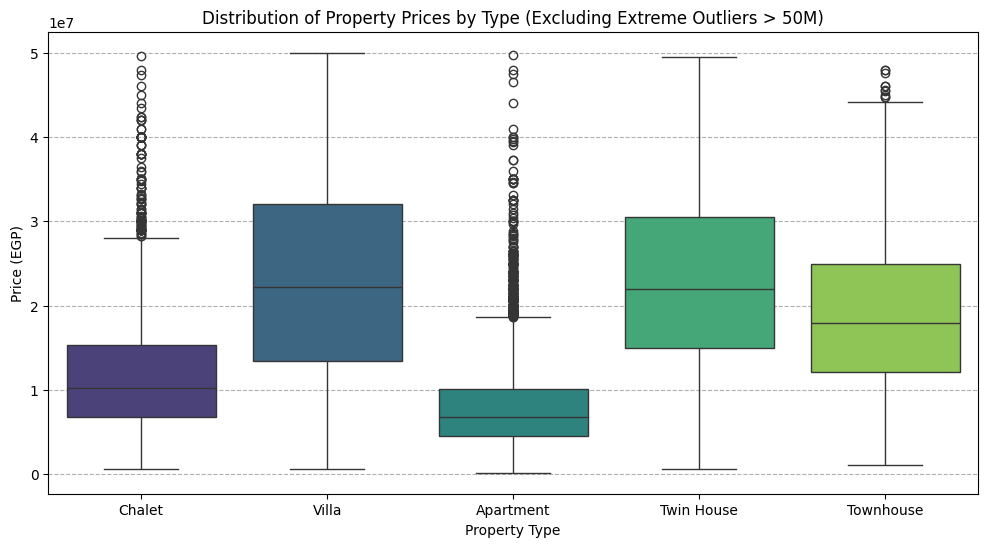

In [51]:
df_plot = df.dropna(subset=['price', 'type']).copy()
MAX_PRICE_LIMIT = 50_000_000
df_plot = df_plot[df_plot['price'] < MAX_PRICE_LIMIT]

# 4. تحديد أنواع العقارات الأكثر تكراراً (لتبسيط الرسم)
top_types = df_plot['type'].value_counts().head(5).index
df_plot = df_plot[df_plot['type'].isin(top_types)]

# 5. رسم Box Plot للمقارنة
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='price', data=df_plot, palette='viridis')
plt.title('Distribution of Property Prices by Type (Excluding Extreme Outliers > 50M)')
plt.xlabel('Property Type')
plt.ylabel('Price (EGP)')
plt.grid(axis='y', linestyle='--')
plt.show()

In [52]:
df.head()

,price,type,bathrooms,available_from,down_payment,category,Project_Name,Area_Details,Region_Governorate,Area,City,is_compound,size_sqm,bedrooms_new,with_maid,payment_method_cleaned,status,Days_to_Availability,price_per_sqm,outlier_flag
0,8000000.0,Chalet,1.0,2025-08-31,1200000.0,Fully Finished,Swan Lake Gouna,"Al Gouna, Hurghada",Red Sea,al gouna,Hurghada,False,68.0,1.0,Maid,Installments,avialble_now,0.0,117647.058824,Valid
1,25000000.0,Villa,4.0,2025-09-02,2100000.0,Ready,Karmell,"New Zayed City, Sheikh Zayed City",Giza,new zayed city,Sheikh Zayed City,False,220.0,4.0,No Maid,Installments,avialble_now,0.0,113636.363636,Valid
2,15135000.0,Chalet,2.0,2025-08-19,1513000.0,Fully Finished,Azha North,Ras Al Hekma,North Coast,ras al hekma,Ras Al Hekma,False,118.0,2.0,No Maid,Installments,avialble_now,0.0,128262.711864,Valid
3,12652000.0,Apartment,2.0,2025-08-26,1260000.0,Semi Finished,Taj City,"5th Settlement Compounds, The 5th Settlement, ...",Cairo,5th settlement,New Cairo City,True,166.0,3.0,No Maid,Installments,avialble_now,0.0,76216.867470,Valid
4,45250000.0,Villa,7.0,2025-09-02,2262500.0,Fully Finished,Granville,New Capital City,Cairo,new capital city,New Capital City,False,400.0,7.0,No Maid,Installments,avialble_now,0.0,113125.000000,Outlier
